In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.patches as patches

In [2]:
# https://scipython.com/blog/nuclear-binding-energies-1/
# Read the experimental data into a Pandas DataFrame.
data = pd.read_fwf('data/mass.mas03', usecols=(2,3,4,11),
              names=('N', 'Z', 'A', 'avEbind'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

In [3]:
data.head()

,N,Z,A,avEbind
0,0,1,1,0.0
1,1,1,2,1112.283
2,2,1,3,2827.266
3,1,2,3,2572.681
4,0,3,3,-2267#


In [5]:
# Extrapolated values are indicated by '#' in place of the decimal place, so
# the avEbind column won't be numeric. Coerce to float and drop these entries.
data['avEbind'] = pd.to_numeric(data['avEbind'], errors='coerce')
data = data.dropna()
# Also convert from keV to MeV.
data['avEbind'] /= 1000

# Group the DataFrame by nucleon number, A.
gdf = data.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
maxavEbind = gdf.apply(lambda t: t[t.avEbind==t.avEbind.max()])

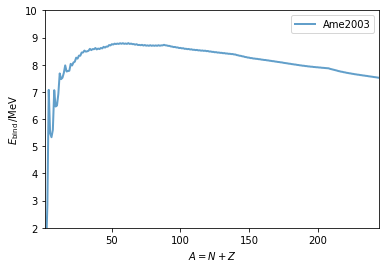

In [7]:
# Generate a plot comparing the experimental with the SEMF values.
fig, ax = plt.subplots()
ax.plot(maxavEbind['A'], maxavEbind['avEbind'], alpha=0.7, lw=2,
            label='Ame2003')
# ax.plot(maxavEbind['A'], maxavEbind['Eapprox'], alpha=0.7, lw=2, c='m',
#             label='SEMF')
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.legend()
# We don't expect the SEMF to work very well for light nuclei with small
# average binding energies, so display only data relevant to avEbind > 7 MeV.
ax.set_xlim(1, 245)
ax.set_ylim(2, 10);

In [8]:
df = maxavEbind
df['avEbind'] = -df['avEbind']

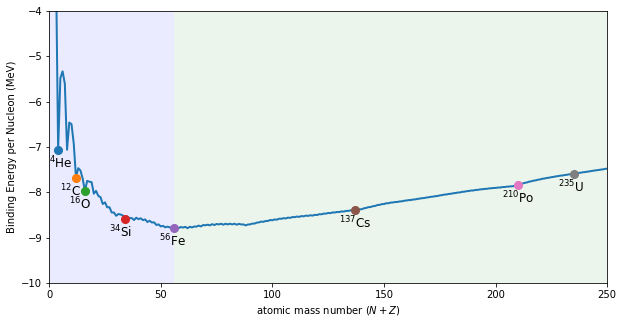

In [9]:
elements_names  = ['He', 'C', 'O', 'Si', 'Fe', 'Cs', 'Po', 'U']
elements_nr = [4, 12, 16, 34, 56, 137, 210, 235]

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ymin, ymax = -10, -4
xmin, xmax = 0, 250

ax.plot(df['A'], df['avEbind'], alpha=1, lw=2, label='Ame2003', zorder=-1)

for name, nr in zip(elements_names, elements_nr):
    ax.scatter(df['A'][nr], df['avEbind'][nr], alpha=1, s=65, zorder=1)
    if nr == 4:
        dx = 4
    else:
        dx = 7
    ax.text(df['A'][nr]-dx, df['avEbind'][nr]-0.4, f'$^{{{nr}}}$' + name, fontsize=12)
ax.set_xlabel(r'atomic mass number ($N + Z$)')
ax.set_ylabel('Binding Energy per Nucleon (MeV)')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

rect1 = patches.Rectangle((xmin, ymin), 56, (ymax-ymin), facecolor='b', alpha=.08, zorder=-2)
rect2 = patches.Rectangle((56, ymin), xmax-56, (ymax-ymin), facecolor='g', alpha=.08, zorder=-2)
ax.add_patch(rect1)
ax.add_patch(rect2);

# ax.plot([56, 56], [ymin, ymax], 'k--', alpha=.3);
# fig.savefig('img/nuclear_binding_energy.pdf', bbox_inches='tight');